In [1]:
import re
import pandas as pd

In [2]:
f = open('Whatsapp Chat with Ex-Hostellers.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{2}\s(?:am|pm)\s-\s'  

In [5]:
messages = re.split(pattern, data)[1:]

In [6]:
dates = re.findall(pattern, data)

In [7]:
df = pd.DataFrame({'user_message':messages, 'message_date': dates})
# convert message_data type
df['message_date'].str.replace('pm', 'PM').str.replace('am', 'AM')
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M %p - ')
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-11-27 23:26:00
1,"Pratyush Singh(Hostel) created group ""Ex-Hoste...",2022-11-27 23:26:00
2,Pratyush Singh(Hostel) added you\n,2022-11-27 23:26:00
3,Anurag(Prittish Room Partner): Vo group leave ...,2022-11-27 23:27:00
4,Pankaj Maheshwari(Hostel): <Media omitted>\n,2022-11-27 23:30:00


In [8]:
df.shape

(984, 2)

In [9]:
# separate users and messages
users=[]
messages=[]
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:# user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2022-11-27 23:26:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-11-27 23:26:00,group_notification,"Pratyush Singh(Hostel) created group ""Ex-Hoste..."
2,2022-11-27 23:26:00,group_notification,Pratyush Singh(Hostel) added you\n
3,2022-11-27 23:27:00,Anurag(Prittish Room Partner),Vo group leave krdo\n
4,2022-11-27 23:30:00,Pankaj Maheshwari(Hostel),<Media omitted>\n


In [10]:
df['year'] = df['date'].dt.year

In [11]:
df.head()

,date,user,message,year
0,2022-11-27 23:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-11-27 23:26:00,group_notification,"Pratyush Singh(Hostel) created group ""Ex-Hoste...",2022
2,2022-11-27 23:26:00,group_notification,Pratyush Singh(Hostel) added you\n,2022
3,2022-11-27 23:27:00,Anurag(Prittish Room Partner),Vo group leave krdo\n,2022
4,2022-11-27 23:30:00,Pankaj Maheshwari(Hostel),<Media omitted>\n,2022


In [12]:
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-11-27 23:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,November,27,23,26
1,2022-11-27 23:26:00,group_notification,"Pratyush Singh(Hostel) created group ""Ex-Hoste...",2022,November,27,23,26
2,2022-11-27 23:26:00,group_notification,Pratyush Singh(Hostel) added you\n,2022,November,27,23,26
3,2022-11-27 23:27:00,Anurag(Prittish Room Partner),Vo group leave krdo\n,2022,November,27,23,27
4,2022-11-27 23:30:00,Pankaj Maheshwari(Hostel),<Media omitted>\n,2022,November,27,23,30


In [13]:
words = []
for message in df['message']:
    words.extend(message.split())

In [14]:
len(words)

3464

In [15]:
!pip install urlextract

In [16]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in")
urls

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [17]:
links=[]

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [18]:
links

['https://youtube.com/shorts/7Dd425Q2Ltc?feature=share',
 'https://youtu.be/NDEkEFRg-hI',
 'https://youtube.com/shorts/KN7YJfeawFo?feature=share',
 'https://www.instagram.com/reel/ClwQi_FrvQU/?igshid=MDJmNzVkMjY=',
 'https://youtube.com/shorts/2VRnQotdo_8?feature=share',
 'https://www.tenderdetail.com/government-tenders/guru-gobind-singh-indraprastha-university-tenders/1?agid=3267',
 'https://youtu.be/FddeeM3aH5M',
 'https://chng.it/fxXWKQ66',
 'https://youtu.be/qR9y6hkXjDs',
 'https://youtube.com/shorts/vaSFAwwR5ys?feature=share',
 'https://www.instagram.com/p/CoeaVMspkYE/?igshid=MDJmNzVkMjY=',
 'https://www.instagram.com/reel/CoNBLZTDPaG/?igshid=OWEyOTRmYTI=',
 'https://engifest.in',
 'https://www.instagram.com/reel/Coo6Kb4uazf/?igshid=OWEyOTRmYTI=',
 'https://youtube.com/shorts/bHq4YEdRq5Q?feature=share',
 'https://www.instagram.com/reel/Co7ayNtpbGs/?igshid=YmMyMTA2M2Y=']

In [19]:
x = df['user'].value_counts().head()

In [20]:
import matplotlib.pyplot as plt

In [21]:
name = x.index
count = x.values

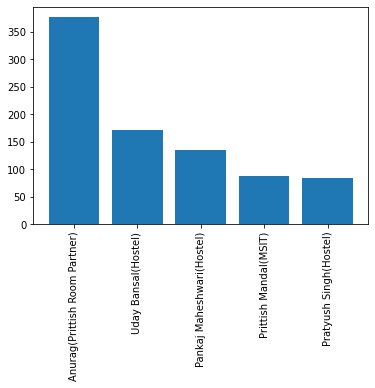

In [22]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

,index,user
0,Anurag(Prittish Room Partner),38.31
1,Uday Bansal(Hostel),17.48
2,Pankaj Maheshwari(Hostel),13.72
3,Prittish Mandal(MSIT),8.94
4,Pratyush Singh(Hostel),8.54
5,Tushar Rastogi,5.39
6,Gausul Azam(Room-204),3.46
7,Suman Sahu(Hostel),2.44
8,group_notification,1.73


In [24]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']
temp = temp[temp['message'] != 'This message was deleted\n']

In [25]:
f = open('stop_words.txt','r')
stop_words = f.read()

In [26]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [27]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,😂,23
1,😂😂,16
2,happy,15
3,birthday,14
4,raat,10
5,🤣🤣🤣,10
6,baat,9
7,party,8
8,flat,8
9,@919990234173,7


In [28]:
!pip install emoji

In [29]:
import emoji

In [30]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [31]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,89
1,🤣,53
2,🥹,12
3,🥳,12
4,🌝,10
5,🙂,10
6,🫶,10
7,🤦,9
8,🤩,8
9,🎉,8


In [32]:
df['month_num'] = df['date'].dt.month

In [33]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [34]:
timeline

,year,month_num,month,message
0,2022,11,November,11
1,2022,12,December,321
2,2023,1,January,304
3,2023,2,February,283
4,2023,3,March,65


In [35]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [36]:
timeline['time'] = time

In [37]:
timeline

,year,month_num,month,message,time
0,2022,11,November,11,November-2022
1,2022,12,December,321,December-2022
2,2023,1,January,304,January-2023
3,2023,2,February,283,February-2023
4,2023,3,March,65,March-2023


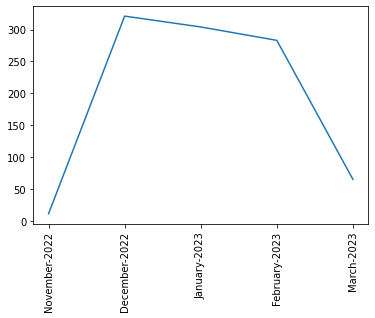

In [38]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
df['only_date'] = df['date'].dt.date

In [40]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

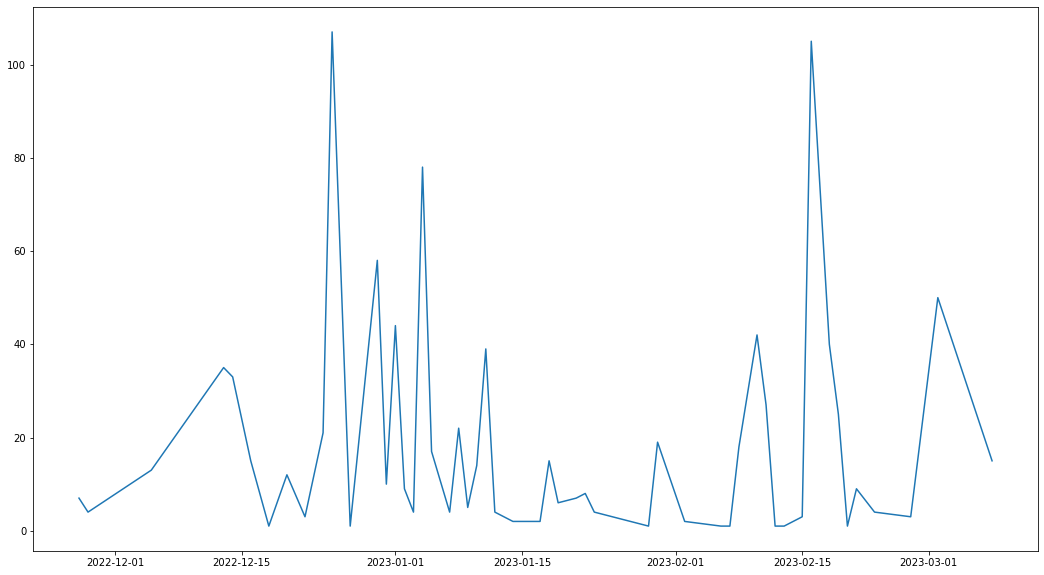

In [41]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [42]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2022-11-27 23:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,November,27,23,26,11,2022-11-27
1,2022-11-27 23:26:00,group_notification,"Pratyush Singh(Hostel) created group ""Ex-Hoste...",2022,November,27,23,26,11,2022-11-27
2,2022-11-27 23:26:00,group_notification,Pratyush Singh(Hostel) added you\n,2022,November,27,23,26,11,2022-11-27
3,2022-11-27 23:27:00,Anurag(Prittish Room Partner),Vo group leave krdo\n,2022,November,27,23,27,11,2022-11-27
4,2022-11-27 23:30:00,Pankaj Maheshwari(Hostel),<Media omitted>\n,2022,November,27,23,30,11,2022-11-27


In [43]:
df['day_name'] = df['date'].dt.day_name() 

In [44]:
df['day_name'].value_counts()

Sunday       216
Wednesday    201
Thursday     191
Friday       127
Saturday     111
Tuesday       78
Monday        60
Name: day_name, dtype: int64

In [45]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2022-11-27 23:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,November,27,23,26,11,2022-11-27,Sunday
1,2022-11-27 23:26:00,group_notification,"Pratyush Singh(Hostel) created group ""Ex-Hoste...",2022,November,27,23,26,11,2022-11-27,Sunday
2,2022-11-27 23:26:00,group_notification,Pratyush Singh(Hostel) added you\n,2022,November,27,23,26,11,2022-11-27,Sunday
3,2022-11-27 23:27:00,Anurag(Prittish Room Partner),Vo group leave krdo\n,2022,November,27,23,27,11,2022-11-27,Sunday
4,2022-11-27 23:30:00,Pankaj Maheshwari(Hostel),<Media omitted>\n,2022,November,27,23,30,11,2022-11-27,Sunday


In [46]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [47]:
df['period'] = period

In [48]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
387,2023-01-03 20:22:00,Anurag(Prittish Room Partner),<Media omitted>\n,2023,January,3,20,22,1,2023-01-03,Tuesday,20-21
522,2023-01-10 21:06:00,Anurag(Prittish Room Partner),This message was deleted\n,2023,January,10,21,6,1,2023-01-10,Tuesday,21-22
928,2023-03-02 22:49:00,Prittish Mandal(MSIT),😂\n,2023,March,2,22,49,3,2023-03-02,Thursday,22-23
587,2023-01-18 00:41:00,Tushar Rastogi,Yeh bol kon Raha hai 🤣\n,2023,January,18,0,41,1,2023-01-18,Wednesday,00-1
356,2023-01-01 09:46:00,Anurag(Prittish Room Partner),<Media omitted>\n,2023,January,1,9,46,1,2023-01-01,Sunday,9-10


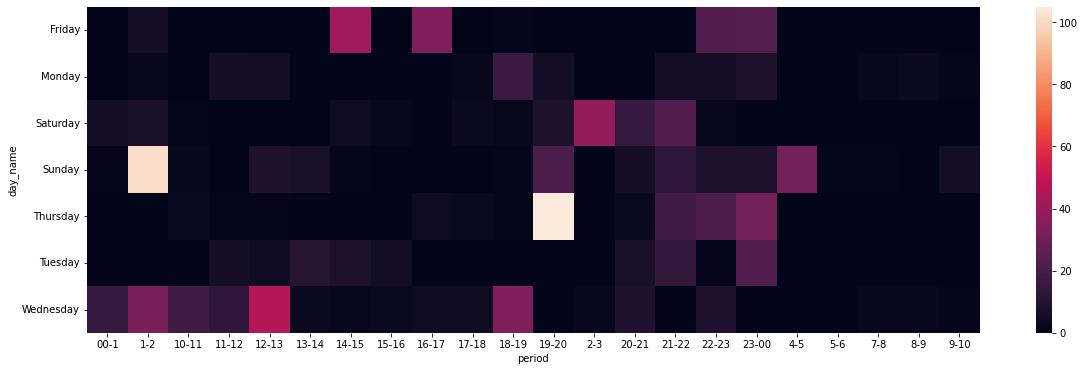

In [49]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()